# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Importing the dataset and analysing

In [2]:
data = pd.read_csv('regression_data.csv')
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [3]:
data.shape

(21597, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
# bedrooms column
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [7]:
# bathrooms column
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [8]:
# floors column
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [9]:
# waterfront column
data['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [10]:
# view column
data['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
# grade column
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

# Cleaning the dataset

In [12]:
# Checking for null values
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [13]:
#Checking for duplicates
data = data.drop_duplicates()
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [14]:
#Dropping some columns
data = data.drop(['id', 'date','sqft_living','sqft_lot'], axis = 1)
data

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [15]:
#Checking for outliers for a few columns and cleaning them

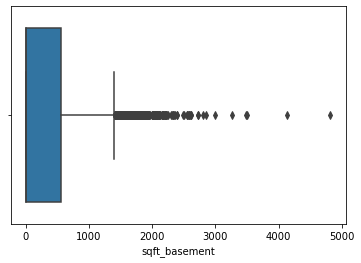

In [16]:
# Column 'sqft_basement'
sns.boxplot(data["sqft_basement"])
plt.show()

In [17]:
iqr = np.percentile(data["sqft_basement"],75) - np.percentile(data["sqft_basement"],25) 
iqr

560.0

In [18]:
upper_limit = np.percentile(data["sqft_basement"],75) + 1.5*iqr
lower_limit = np.percentile(data["sqft_basement"],25) - 1.5*iqr
upper_limit, lower_limit

(1400.0, -840.0)

In [19]:
data = data[(data["sqft_basement"]>lower_limit) & (data["sqft_basement"]<upper_limit)]
data

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


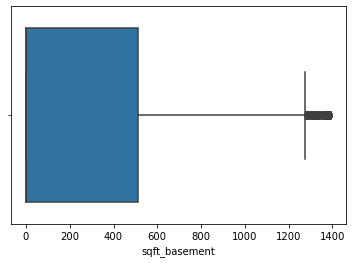

In [20]:
sns.boxplot(data["sqft_basement"])
plt.show()

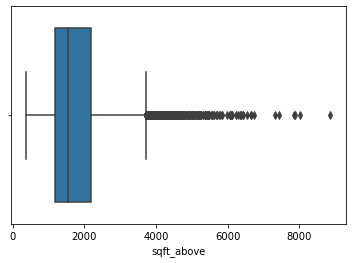

In [21]:
# Column 'sqft_above'
sns.boxplot(data["sqft_above"])
plt.show()

In [22]:
iqr = np.percentile(data["sqft_above"],75) - np.percentile(data["sqft_above"],25) 
iqr

1015.0

In [23]:
upper_limit = np.percentile(data["sqft_above"],75) + 1.5*iqr
lower_limit = np.percentile(data["sqft_above"],25) - 1.5*iqr
upper_limit, lower_limit

(3717.5, -342.5)

In [24]:
data = data[(data["sqft_above"]>lower_limit) & (data["sqft_above"]<upper_limit)]
data

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


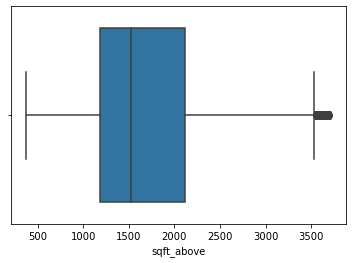

In [25]:
sns.boxplot(data["sqft_above"])
plt.show()

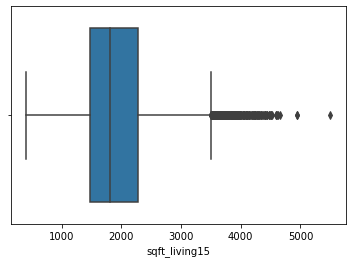

In [26]:
# Column 'sqft_living15'
sns.boxplot(data["sqft_living15"])
plt.show()

In [27]:
iqr = np.percentile(data["sqft_living15"],75) - np.percentile(data["sqft_living15"],25) 
iqr

810.0

In [28]:
upper_limit = np.percentile(data["sqft_living15"],75) + 1.5*iqr
lower_limit = np.percentile(data["sqft_living15"],25) - 1.5*iqr
upper_limit, lower_limit

(3495.0, 255.0)

In [29]:
data = data[(data["sqft_living15"]>lower_limit) & (data["sqft_living15"]<upper_limit)]
data

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


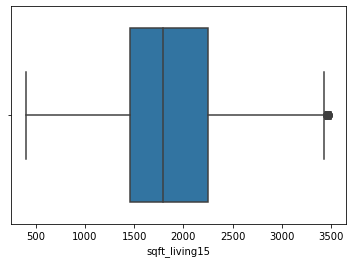

In [30]:
sns.boxplot(data["sqft_living15"])
plt.show()

# Checking for correlation and dropping some columns (if necessary)

In [31]:
corr_data = data.select_dtypes([np.number])
correlations_matrix1 = corr_data.corr()
correlations_matrix1

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.477359,0.164113,-0.026517,0.030847,0.030152,0.305029,0.466320,0.265271,0.137804,0.018024,-0.137638,-0.024854,0.115383,0.355102,0.006972,0.263578
bathrooms,0.477359,1.000000,0.514403,0.023092,0.111560,-0.124914,0.606041,0.625430,0.227714,0.519208,0.049918,-0.186483,0.001659,0.202796,0.503485,0.032144,0.431553
floors,0.164113,0.514403,1.000000,0.016310,0.020667,-0.258055,0.466152,0.538883,-0.267878,0.486943,0.009536,-0.049321,0.043790,0.104718,0.262113,-0.038648,0.268857
waterfront,-0.026517,0.023092,0.016310,1.000000,0.381888,0.019733,0.035581,0.027613,0.028271,-0.032275,0.081403,0.037540,-0.025615,-0.046637,0.048320,0.033700,0.177320
view,0.030847,0.111560,0.020667,0.381888,1.000000,0.038016,0.171651,0.094155,0.185789,-0.079889,0.099093,0.114279,-0.005547,-0.095166,0.207434,0.069301,0.325293
condition,0.030152,-0.124914,-0.258055,0.019733,0.038016,1.000000,-0.147862,-0.156059,0.176193,-0.354668,-0.059854,-0.003405,-0.014683,-0.093157,-0.093519,0.004149,0.060129
grade,0.305029,0.606041,0.466152,0.035581,0.171651,-0.147862,1.000000,0.689902,0.086029,0.451336,0.013066,-0.154727,0.102847,0.164640,0.637989,0.063091,0.615505
sqft_above,0.466320,0.625430,0.538883,0.027613,0.094155,-0.156059,0.689902,1.000000,-0.168810,0.430383,0.025026,-0.262088,-0.040203,0.341725,0.691420,0.145285,0.497155
sqft_basement,0.265271,0.227714,-0.267878,0.028271,0.185789,0.176193,0.086029,-0.168810,1.000000,-0.168335,0.063909,0.124376,0.121598,-0.178486,0.114988,-0.013233,0.254680
yr_built,0.137804,0.519208,0.486943,-0.032275,-0.079889,-0.354668,0.451336,0.430383,-0.168335,1.000000,-0.223068,-0.338695,-0.159453,0.394579,0.317583,0.052617,-0.002849


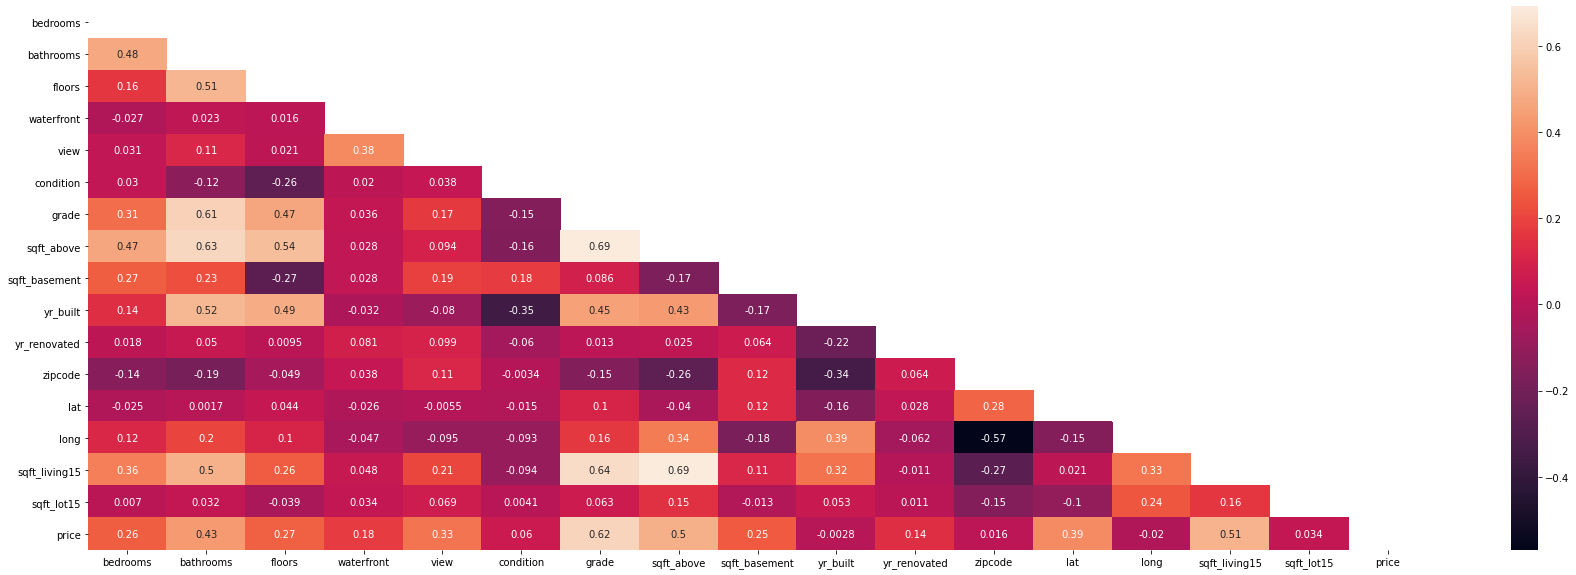

In [32]:
mask = np.zeros_like(correlations_matrix1)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(30, 10))
figure = sns.heatmap(correlations_matrix1, mask=mask, annot=True)
plt.savefig('hmap.png', dpi=500)
plt.show()

In [33]:
data = data.drop(['condition','yr_built','yr_renovated','zipcode','long','sqft_lot15'], axis = 1)
data

,bedrooms,bathrooms,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,price
0,3,1.00,1.0,0,0,7,1180,0,47.5112,1340,221900
1,3,2.25,2.0,0,0,7,2170,400,47.7210,1690,538000
2,2,1.00,1.0,0,0,6,770,0,47.7379,2720,180000
3,4,3.00,1.0,0,0,7,1050,910,47.5208,1360,604000
4,3,2.00,1.0,0,0,8,1680,0,47.6168,1800,510000
...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,8,1530,0,47.6993,1530,360000
21593,4,2.50,2.0,0,0,8,2310,0,47.5107,1830,400000
21594,2,0.75,2.0,0,0,7,1020,0,47.5944,1020,402101
21595,3,2.50,2.0,0,0,8,1600,0,47.5345,1410,400000


# Converting some columns' type from numerical to categorical

In [34]:
data = data.astype({"bedrooms": object, "bathrooms": object, "floors":object, "waterfront":object, "view":object, "grade":object})

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20144 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       20144 non-null  object 
 1   bathrooms      20144 non-null  object 
 2   floors         20144 non-null  object 
 3   waterfront     20144 non-null  object 
 4   view           20144 non-null  object 
 5   grade          20144 non-null  object 
 6   sqft_above     20144 non-null  int64  
 7   sqft_basement  20144 non-null  int64  
 8   lat            20144 non-null  float64
 9   sqft_living15  20144 non-null  int64  
 10  price          20144 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.8+ MB


# Separating numerical and categorical columns for pre-processing

In [36]:
y = data['price']
X = data.drop(['price'], axis=1)

In [37]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [38]:
X_num

,sqft_above,sqft_basement,lat,sqft_living15
0,1180,0,47.5112,1340
1,2170,400,47.7210,1690
2,770,0,47.7379,2720
3,1050,910,47.5208,1360
4,1680,0,47.6168,1800
...,...,...,...,...
21592,1530,0,47.6993,1530
21593,2310,0,47.5107,1830
21594,1020,0,47.5944,1020
21595,1600,0,47.5345,1410


In [39]:
X_cat

,bedrooms,bathrooms,floors,waterfront,view,grade
0,3,1.0,1.0,0,0,7
1,3,2.25,2.0,0,0,7
2,2,1.0,1.0,0,0,6
3,4,3.0,1.0,0,0,7
4,3,2.0,1.0,0,0,8
...,...,...,...,...,...,...
21592,3,2.5,3.0,0,0,8
21593,4,2.5,2.0,0,0,8
21594,2,0.75,2.0,0,0,7
21595,3,2.5,2.0,0,0,8


# One hot Encoding  for categorical columns

In [40]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [41]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
X = np.concatenate([X_num, encoded], axis=1)
X

array([[1180.    ,    0.    ,   47.5112, ...,    0.    ,    0.    ,
           0.    ],
       [2170.    ,  400.    ,   47.721 , ...,    0.    ,    0.    ,
           0.    ],
       [ 770.    ,    0.    ,   47.7379, ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [1020.    ,    0.    ,   47.5944, ...,    0.    ,    0.    ,
           0.    ],
       [1600.    ,    0.    ,   47.5345, ...,    0.    ,    0.    ,
           0.    ],
       [1020.    ,    0.    ,   47.5941, ...,    0.    ,    0.    ,
           0.    ]])

# Fitting the model

In [65]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     684.7
Date:                Sat, 04 Sep 2021   Prob (F-statistic):               0.00
Time:                        08:45:19   Log-Likelihood:            -2.6914e+05
No. Observations:               20144   AIC:                         5.384e+05
Df Residuals:                   20089   BIC:                         5.388e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.821e+07   4.18e+05    -67.450      0.0

## using non-normalized and one-hot encoded data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
predictions  = model.predict(X_test)
predictions.shape

(6044,)

In [46]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.6425359106915848, 153008.05219722964, 23411464037.190147)

## using standardized and one-hot encoded data

In [47]:
transformer = StandardScaler()
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized

array([[-0.74251911, -0.67489415, -0.33362778, -0.97906463],
       [ 0.73347143,  0.37884004,  1.16014032, -0.3560763 ],
       [-1.35378793, -0.67489415,  1.28046768,  1.47728935],
       ...,
       [-0.98106304, -0.67489415,  0.25875309, -1.54865396],
       [-0.11634131, -0.67489415, -0.16773265, -0.85446696],
       [-0.98106304, -0.67489415,  0.2566171 , -1.54865396]])

In [48]:
x_standardized.shape

(20144, 4)

In [49]:
X2 = np.concatenate([x_standardized, encoded], axis=1)
X2

array([[-0.74251911, -0.67489415, -0.33362778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.73347143,  0.37884004,  1.16014032, ...,  0.        ,
         0.        ,  0.        ],
       [-1.35378793, -0.67489415,  1.28046768, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.98106304, -0.67489415,  0.25875309, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11634131, -0.67489415, -0.16773265, ...,  0.        ,
         0.        ,  0.        ],
       [-0.98106304, -0.67489415,  0.2566171 , ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X2_train,y_train)

LinearRegression()

In [52]:
predictions2  = model.predict(X2_test)
predictions2.shape

(6044,)

In [53]:
r2_score(y_test, predictions2), mean_squared_error(y_test, predictions2, squared=False), mean_squared_error(y_test, predictions2)

(0.6425359106915788, 153008.05219723092, 23411464037.19054)

## using normalized and one-hot encoded data

In [54]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(20144, 4)


In [55]:
x_normalized

array([[0.66064652, 0.        , 0.02660009, 0.75022571],
       [0.78063224, 0.14389534, 0.01716707, 0.60795783],
       [0.27234543, 0.        , 0.01688467, 0.96205139],
       ...,
       [0.70672221, 0.        , 0.03297649, 0.70672221],
       [0.75006194, 0.        , 0.02228364, 0.66099208],
       [0.70672221, 0.        , 0.03297628, 0.70672221]])

In [56]:
X1 = np.concatenate([x_normalized, encoded], axis=1)
X1

array([[0.66064652, 0.        , 0.02660009, ..., 0.        , 0.        ,
        0.        ],
       [0.78063224, 0.14389534, 0.01716707, ..., 0.        , 0.        ,
        0.        ],
       [0.27234543, 0.        , 0.01688467, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.70672221, 0.        , 0.03297649, ..., 0.        , 0.        ,
        0.        ],
       [0.75006194, 0.        , 0.02228364, ..., 0.        , 0.        ,
        0.        ],
       [0.70672221, 0.        , 0.03297628, ..., 0.        , 0.        ,
        0.        ]])

In [57]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X1_train,y_train)

LinearRegression()

In [59]:
predictions  = model.predict(X1_test)
predictions.shape

(6044,)

In [60]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.5296584762910739, 175511.16049598044, 30804167458.6458)

## using KNN Regresor and one-hot encoded data

In [61]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=100)

In [62]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X2_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [63]:
predictions = model.predict(X2_test)
score = model.score(X2_test, y_test)

In [64]:
score

0.6640089521213864